In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['lojas.csv', 'dataset_teste.csv', 'sample_submission.csv', 'dataset_treino.csv']


In [2]:
#Loading Datasets

df_train = pd.read_csv('../input/dataset_treino.csv')
df_test = pd.read_csv('../input/dataset_teste.csv')
df_stores = pd.read_csv('../input/lojas.csv')

In [3]:
#Doing a merge of the original datasets with complementary informations about the stores


df_train = df_train.merge(df_stores, on = 'Store', how = 'left')
df_test = df_test.merge(df_stores, on = 'Store', how = 'left')

print(df_train.shape, df_test.shape)

(1017209, 18) (41088, 17)


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [6]:


var_id = df_test['Id']

var_id.head()



0    1
1    2
2    3
3    4
4    5
Name: Id, dtype: int64

In [7]:
#Deleting 'ID'

df_test = df_test.drop(['Id'], axis = 1)

df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [8]:
#Deleting "Costumers", a variable that is presente in df_train but not in df_test

df_train = df_train.drop(['Customers'], axis = 1)

df_train.head()

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
#Moving target column 'Sales' to the last index position (just a preference).

df_train['Sales1'] = df_train['Sales']
df_train = df_train.drop(['Sales'], axis = 1)

df_train.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales1
0,1,5,2015-07-31,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5263
1,2,5,2015-07-31,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6064
2,3,5,2015-07-31,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",8314
3,4,5,2015-07-31,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,13995
4,5,5,2015-07-31,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4822


In [10]:
#Concat function in both datasets for pre-processing

df_test['Sales1'] = -1
df_united = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

df_united.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales1
0,1,5,2015-07-31,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5263
1,2,5,2015-07-31,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6064
2,3,5,2015-07-31,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",8314
3,4,5,2015-07-31,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,13995
4,5,5,2015-07-31,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,4822


In [11]:
print('shapes: ', df_united[df_united['Sales1'] != -1].shape, df_united[df_united['Sales1'] == -1].shape)

shapes:  (1017209, 17) (41088, 17)


In [12]:
#Checking missing values

pd.DataFrame(df_united.isnull().sum().sort_values(ascending=False))

,0
Promo2SinceYear,525263
Promo2SinceWeek,525263
PromoInterval,525263
CompetitionOpenSinceYear,338564
CompetitionOpenSinceMonth,338564
CompetitionDistance,2738
Open,11
Sales1,0
Promo,0
DayOfWeek,0


In [13]:
#Deleting variables with > 50% of missing values

df_united = df_united.drop(['Promo2SinceYear', 'Promo2SinceWeek', 'PromoInterval'], axis = 1)

df_united.head()


,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Sales1
0,1,5,2015-07-31,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,5263
1,2,5,2015-07-31,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,6064
2,3,5,2015-07-31,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,8314
3,4,5,2015-07-31,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,13995
4,5,5,2015-07-31,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,4822


In [14]:
#Checking variable types

df_united.dtypes


Store                          int64
DayOfWeek                      int64
Date                          object
Open                         float64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Sales1                         int64
dtype: object

In [15]:
#Extracting Month, year and day from "Date"

df_united['Date'] = pd.to_datetime(df_united['Date'])

df_united['Year'] = df_united['Date'].apply(lambda data: data.year)
df_united['Month'] = df_united['Date'].apply(lambda data: data.month)
df_united['Day'] = df_united['Date'].apply(lambda data: data.day)
df_united.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Sales1,Year,Month,Day
0,1,5,2015-07-31,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,5263,2015,7,31
1,2,5,2015-07-31,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,6064,2015,7,31
2,3,5,2015-07-31,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,8314,2015,7,31
3,4,5,2015-07-31,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,13995,2015,7,31
4,5,5,2015-07-31,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,4822,2015,7,31


In [16]:
#Same as Cell 10

df_united['Sales Amount'] = df_united['Sales1']
df_united = df_united.drop(['Sales1'], axis = 1)

df_united.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Year,Month,Day,Sales Amount
0,1,5,2015-07-31,1.0,1,0,1,c,a,1270.0,9.0,2008.0,0,2015,7,31,5263
1,2,5,2015-07-31,1.0,1,0,1,a,a,570.0,11.0,2007.0,1,2015,7,31,6064
2,3,5,2015-07-31,1.0,1,0,1,a,a,14130.0,12.0,2006.0,1,2015,7,31,8314
3,4,5,2015-07-31,1.0,1,0,1,c,c,620.0,9.0,2009.0,0,2015,7,31,13995
4,5,5,2015-07-31,1.0,1,0,1,a,a,29910.0,4.0,2015.0,0,2015,7,31,4822


In [17]:
#Organizing column names

df_united = df_united[['Store',
 'DayOfWeek',
 'Date',
 'Year',
 'Month',
 'Day',
 'Open',
 'Promo',
 'Promo2',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Sales Amount']]
df_united.head()

,Store,DayOfWeek,Date,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Sales Amount
0,1,5,2015-07-31,2015,7,31,1.0,1,0,0,1,c,a,1270.0,9.0,2008.0,5263
1,2,5,2015-07-31,2015,7,31,1.0,1,1,0,1,a,a,570.0,11.0,2007.0,6064
2,3,5,2015-07-31,2015,7,31,1.0,1,1,0,1,a,a,14130.0,12.0,2006.0,8314
3,4,5,2015-07-31,2015,7,31,1.0,1,0,0,1,c,c,620.0,9.0,2009.0,13995
4,5,5,2015-07-31,2015,7,31,1.0,1,0,0,1,a,a,29910.0,4.0,2015.0,4822


In [18]:
#Type of each column

df_united.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Year                                  int64
Month                                 int64
Day                                   int64
Open                                float64
Promo                                 int64
Promo2                                int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Sales Amount                          int64
dtype: object

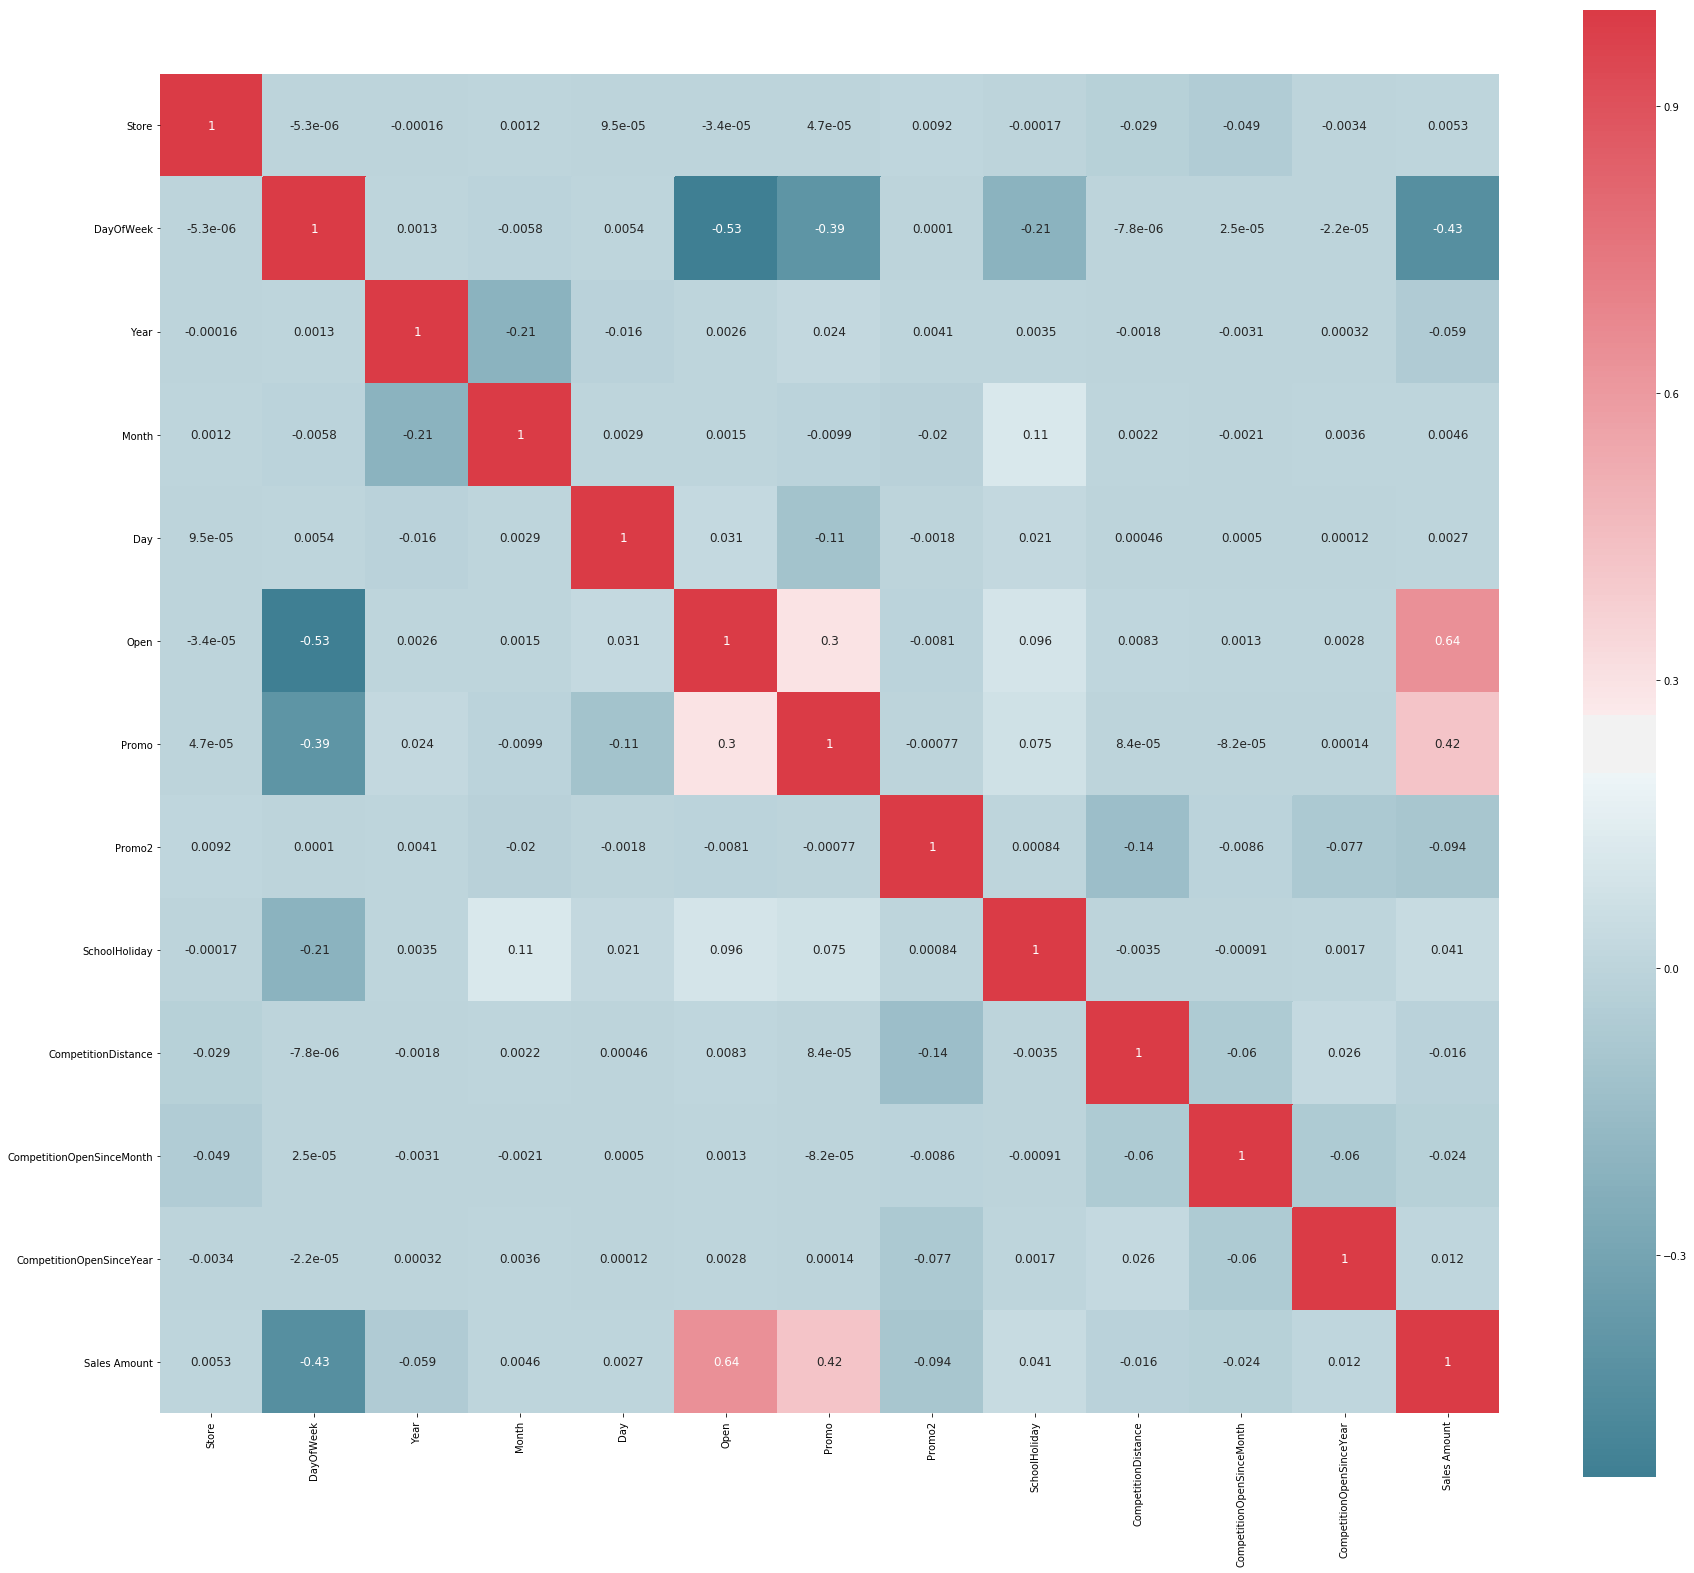

In [19]:
#Checking correlation between numerical variables


dataset_num = df_united._get_numeric_data()

import seaborn as sns

corr = dataset_num.corr()
_ , ax = plt.subplots( figsize =( 30 , 30 ) )
cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
_ = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = {'fontsize' : 12 })



In [20]:
pd.DataFrame(df_united.isnull().sum().sort_values(ascending=False))

,0
CompetitionOpenSinceMonth,338564
CompetitionOpenSinceYear,338564
CompetitionDistance,2738
Open,11
Sales Amount,0
DayOfWeek,0
Date,0
Year,0
Month,0
Day,0


In [21]:
#Deleting "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear" due high missing values amount and absence of high correlation


df_united = df_united.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear'], axis = 1)

df_united.head()

#Os dados missing das variáveis 'CompetitionDistance' e 'Open' serão tratados mais tarde.

,Store,DayOfWeek,Date,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015-07-31,2015,7,31,1.0,1,0,0,1,c,a,1270.0,5263
1,2,5,2015-07-31,2015,7,31,1.0,1,1,0,1,a,a,570.0,6064
2,3,5,2015-07-31,2015,7,31,1.0,1,1,0,1,a,a,14130.0,8314
3,4,5,2015-07-31,2015,7,31,1.0,1,0,0,1,c,c,620.0,13995
4,5,5,2015-07-31,2015,7,31,1.0,1,0,0,1,a,a,29910.0,4822


In [22]:
#Type of each variable

convert_dict = {'Open':object, 'Promo':object, 'Promo2':object, 'SchoolHoliday':object, 'Year': object, 'Store': object
               , 'DayOfWeek': object, 'Month':object, 'Day': object}


df_united = df_united.astype(convert_dict) 
print(df_united.dtypes)

Store                          object
DayOfWeek                      object
Date                   datetime64[ns]
Year                           object
Month                          object
Day                            object
Open                           object
Promo                          object
Promo2                         object
StateHoliday                   object
SchoolHoliday                  object
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Sales Amount                    int64
dtype: object


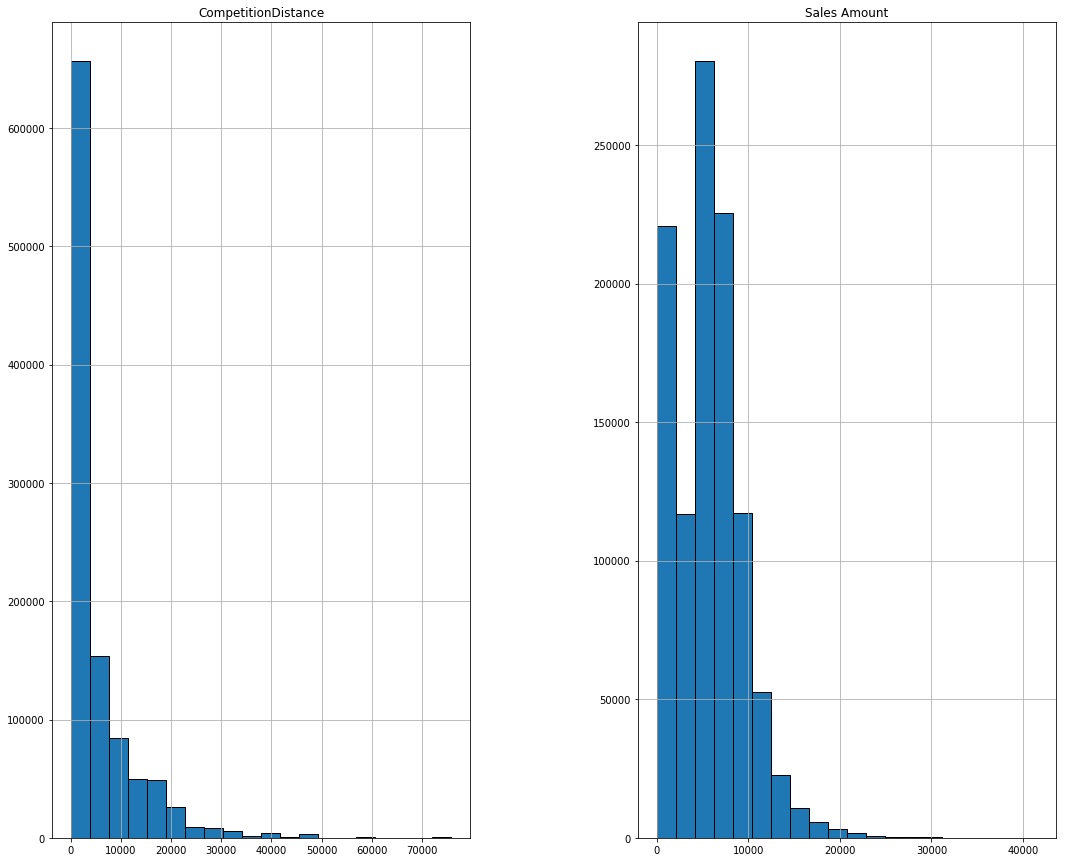

In [23]:
#Exploratory analysis of numerical variable

dataset_num = df_united._get_numeric_data()

columns=dataset_num.columns
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in zip(columns,range(length)):
    plt.subplot((length/2),2,j+1)
    plt.subplots_adjust(wspace=0.4,hspace=0.1)
    dataset_num[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [25]:
#Deleting "Date" column (Extraction was made in cell 15)

df_united = df_united.drop(['Date'], axis = 1)
df_united.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,c,a,1270.0,5263
1,2,5,2015,7,31,1,1,1,0,1,a,a,570.0,6064
2,3,5,2015,7,31,1,1,1,0,1,a,a,14130.0,8314
3,4,5,2015,7,31,1,1,0,0,1,c,c,620.0,13995
4,5,5,2015,7,31,1,1,0,0,1,a,a,29910.0,4822


In [26]:
#Pre Processing

#handling missing values of 'CompetitionDistance' e 'Promo'

df_united['CompetitionDistance'].fillna(df_united['CompetitionDistance'].mean(), inplace=True)

df_united['CompetitionDistance'] = df_united['CompetitionDistance'].astype(int)

df_united.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,c,a,1270,5263
1,2,5,2015,7,31,1,1,1,0,1,a,a,570,6064
2,3,5,2015,7,31,1,1,1,0,1,a,a,14130,8314
3,4,5,2015,7,31,1,1,0,0,1,c,c,620,13995
4,5,5,2015,7,31,1,1,0,0,1,a,a,29910,4822


In [27]:
df_united.dtypes

Store                  object
DayOfWeek              object
Year                   object
Month                  object
Day                    object
Open                   object
Promo                  object
Promo2                 object
StateHoliday           object
SchoolHoliday          object
StoreType              object
Assortment             object
CompetitionDistance     int64
Sales Amount            int64
dtype: object

In [28]:
df_united['Open'] = df_united['Open'].fillna(0)

df_united['Open'] = df_united['Open'].astype('object')

df_united.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,c,a,1270,5263
1,2,5,2015,7,31,1,1,1,0,1,a,a,570,6064
2,3,5,2015,7,31,1,1,1,0,1,a,a,14130,8314
3,4,5,2015,7,31,1,1,0,0,1,c,c,620,13995
4,5,5,2015,7,31,1,1,0,0,1,a,a,29910,4822


In [29]:
pd.DataFrame(df_united.isnull().sum().sort_values(ascending=False))

#Everything's fine.

,0
Sales Amount,0
CompetitionDistance,0
Assortment,0
StoreType,0
SchoolHoliday,0
StateHoliday,0
Promo2,0
Promo,0
Open,0
Day,0


In [30]:
# Preparation for ML input

df_united.dtypes

Store                  object
DayOfWeek              object
Year                   object
Month                  object
Day                    object
Open                   object
Promo                  object
Promo2                 object
StateHoliday           object
SchoolHoliday          object
StoreType              object
Assortment             object
CompetitionDistance     int64
Sales Amount            int64
dtype: object

In [31]:
#Transformation in 'StoreType' ,'Assortment' and 'StateHoliday' columns (string to number)

def StoreType_numeric(x):
    if x=='a':
        return 1
    if x=='b':
        return 2
    if x=='c':
        return 3
    if x=='d':
        return 4
    
    
df_united['StoreType'] = df_united['StoreType'].apply(StoreType_numeric)
df_united['StoreType'] = df_united['StoreType'].astype(object)
df_united.head()


,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,3,a,1270,5263
1,2,5,2015,7,31,1,1,1,0,1,1,a,570,6064
2,3,5,2015,7,31,1,1,1,0,1,1,a,14130,8314
3,4,5,2015,7,31,1,1,0,0,1,3,c,620,13995
4,5,5,2015,7,31,1,1,0,0,1,1,a,29910,4822


In [32]:
def Assortment_numeric(x):
    if x=='a':
        return 1
    if x=='b':
        return 2
    if x=='c':
        return 3
    
    
df_united['Assortment'] = df_united['Assortment'].apply(StoreType_numeric)
df_united['Assortment'] = df_united['Assortment'].astype(object)
df_united.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,3,1,1270,5263
1,2,5,2015,7,31,1,1,1,0,1,1,1,570,6064
2,3,5,2015,7,31,1,1,1,0,1,1,1,14130,8314
3,4,5,2015,7,31,1,1,0,0,1,3,3,620,13995
4,5,5,2015,7,31,1,1,0,0,1,1,1,29910,4822


In [33]:
pd.DataFrame(df_united.isnull().sum().sort_values(ascending=False))

,0
Sales Amount,0
CompetitionDistance,0
Assortment,0
StoreType,0
SchoolHoliday,0
StateHoliday,0
Promo2,0
Promo,0
Open,0
Day,0


In [34]:
def Holiday_numeric(x):
    if x=='0':
        return 0
    if x==0:
        return 0
    if x=='a':
        return 1
    if x=='b':
        return 2
    if x=='c':
        return 3
      
    
df_united['StateHoliday'] = df_united['StateHoliday'].apply(Holiday_numeric)
df_united['StateHoliday'] = df_united['StateHoliday'].astype(object)
df_united.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,3,1,1270,5263
1,2,5,2015,7,31,1,1,1,0,1,1,1,570,6064
2,3,5,2015,7,31,1,1,1,0,1,1,1,14130,8314
3,4,5,2015,7,31,1,1,0,0,1,3,3,620,13995
4,5,5,2015,7,31,1,1,0,0,1,1,1,29910,4822


In [35]:
#Splitting dataframe in 3 parts

#df_norm = numerical set (normalization process)
#df_categ = categorical features
#target = target variable(Sales Amount)


df_norm = df_united['CompetitionDistance']
df_categ = df_united.select_dtypes(include=[object])
target = df_united['Sales Amount']





In [36]:
#Adjusting df_norm and target

df_norm = pd.DataFrame(df_norm)
target = pd.DataFrame(target)

print(df_norm.shape, target.shape)



(1058297, 1) (1058297, 1)


In [37]:
#Min Max Scaler on Numerical Column

from sklearn import preprocessing

x = df_norm

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)

df_1 = pd.DataFrame(x_scaled)

df_1.head()

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,0
0,0.016482
1,0.007252
2,0.186050
3,0.007911
4,0.394119


In [38]:
#Concatenating datasets again

df_final = pd.concat([df_categ, df_norm, target], axis = 1)

df_final.head()



,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
0,1,5,2015,7,31,1,1,0,0,1,3,1,1270,5263
1,2,5,2015,7,31,1,1,1,0,1,1,1,570,6064
2,3,5,2015,7,31,1,1,1,0,1,1,1,14130,8314
3,4,5,2015,7,31,1,1,0,0,1,3,3,620,13995
4,5,5,2015,7,31,1,1,0,0,1,1,1,29910,4822


In [39]:
#Machine Learning Process
#Dataset split
train_set = df_final[df_final['Sales Amount'] != -1]
test_set = df_final[df_final['Sales Amount'] == -1]

print(train_set.shape, test_set.shape)

(1017209, 14) (41088, 14)


In [40]:
#Drop artificial information from 'Sales amount' on teste set from the beggining of script

x_test = test_set.drop('Sales Amount', axis = 1)
y_test = test_set['Sales Amount'] #Just an artificial information to use on cross_val_predict in ML process

test_set.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Sales Amount
1017209,1,4,2015,9,17,1,1,0,0,0,3,1,1270,-1
1017210,3,4,2015,9,17,1,1,1,0,0,1,1,14130,-1
1017211,7,4,2015,9,17,1,1,0,0,0,1,3,24000,-1
1017212,8,4,2015,9,17,1,1,0,0,0,1,1,7520,-1
1017213,9,4,2015,9,17,1,1,0,0,0,1,3,2030,-1


In [41]:
#X and Y train for cross validation process

x_train = train_set.iloc[:,0:13] 
y_train = train_set['Sales Amount']

In [42]:
x_train.head()

,Store,DayOfWeek,Year,Month,Day,Open,Promo,Promo2,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance
0,1,5,2015,7,31,1,1,0,0,1,3,1,1270
1,2,5,2015,7,31,1,1,1,0,1,1,1,570
2,3,5,2015,7,31,1,1,1,0,1,1,1,14130
3,4,5,2015,7,31,1,1,0,0,1,3,3,620
4,5,5,2015,7,31,1,1,0,0,1,1,1,29910


In [43]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Training
model = RandomForestRegressor(n_estimators = 100, random_state = 7)

model.fit(x_train, y_train)

#Calculando a precisão do modelo
R2 = model.score(x_train, y_train)

print("Accuracy:" %R2)


Accuracy:


In [46]:
#Signals of Overfitting. Let's see the performance on test set.
R2

0.9934304648292567

In [48]:
#Predicting values for submission

pred = np.round(model.predict(x_test)).astype(int)
pred[pred < 0] = 0


submission = pd.DataFrame({'Id': var_id, 'Sales': pred })
submission.to_csv('submission.csv',index=False)


(41088, 2)